## Author- Prateek Shrivastava

### First Identify the open web APIs
API Chosen:

A single API that was chosen for this project was that provided by https://openweathermap.org/

To see this API we need to register first which allows us to get the free 60 day trial. This API has the many option I choose by Zip code option. 
After signing up, I got a API key which I have used to get the current weather data on the basis of zip code and country code.

#### Importing the necessary libraries used in this project:

In [435]:
import bs4
import os
import urllib.request
import csv
import pandas as pd 
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime
from datetime import timedelta


#import plotly as py

## Second: Collect data your chosen API(s)
### Collecting Raw Data - Functions needed:
### The API gives the current up to date data
#### The following 3 functions were written to allow multiple calls of the API as only limited data is available per call.
#### These function are commented throughout and are called below:

In [3]:
def create_file (file_loc, headings): # This is method used to create the file
    with open(file_loc, "w",newline='') as write_file:    # used the w option to write the file into the location
        f = csv.writer(write_file)   # writing the csv file
        # The below is the header of the csv ile.
        f.writerow(["Cloudiness", "Weather_type", "latitude", "longitude", "City_id", "Visibility", "CountryID", "Country", "Sunrise_Time", "Sunset_Time", "Temperature", "humidity", "pressure", "Min_temp", "Max_temp","Wind_Speeed", "Wind_Dire","Data_cal_Time", "cod" ])
    write_file.close()

#function to call the API, retreive the raw csv data, and write to a file
def get_and_write_data(link, file_loc):      # This is the method for writing the data into csv file
    response = urllib.request.urlopen(link)  # taking the response of the API request
    html = response.read().decode() # decoding the response
    data = json.loads(html) # parsing the response into the JSON which gives a dictionary type output consist key and values. 
    
    with open(file_loc, "a", newline='') as write_file: #open the file /create it, newline ='' to prevent blank lines being written and used the "a" option to append the rows. 
        f = csv.writer(write_file)
        f = csv.writer(write_file)
        
        wem= dict(data["weather"][0])  # As the weather key is the only key has the importtant data so I have filtered the other out.
        f.writerow([data["clouds"]["all"], wem["main"],data["coord"]["lat"],data["coord"]["lon"],data["id"],\
                    data["visibility"],data["sys"]["id"],data["sys"]["country"], \
                    datetime.datetime.fromtimestamp(int(data["sys"]["sunrise"])).strftime('%Y-%m-%d %H:%M:%S'),\
                    datetime.datetime.fromtimestamp(int(data["sys"]["sunset"])).strftime('%Y-%m-%d %H:%M:%S'),\
                    data["main"]["temp"], data["main"]["humidity"],data["main"]["pressure"], data["main"]["temp_min"],\
                    data["main"]["temp_max"], data["wind"]["speed"], data["wind"]["deg"],\
                    datetime.datetime.fromtimestamp(int(data["dt"])).strftime('%Y-%m-%d %H:%M:%S'),data["cod"]])
# above writing the rows as per the values prsent in the key of the json dictinary.
        
    write_file.close()
    
# function to take in parameters set and then use this data to build a link to be passed into the get_and_write_data function    
def get_raw_data(file_loc,api_key, a,cc):
    link=[]
    i=0
    
    while i<len(a):   # used loop to fetch the link as many time as data is needed. "a" is defined in the below cell.
        s1= str(a[i])
        y1= "http://api.openweathermap.org/data/2.5/weather?zip="+s1+","+cc+akey   # putting the varialbe in the API to request with diffrent data
        #print(s1)
        # y2= requests.get(y1, params = akey)
        print(y2)
        #link.append(y2.text)
        i+=1
        get_and_write_data(y1, file_loc) # calling the get_and_write_data method with filename and link for fetching the API data above
    

<h2>Now Parse the collected data, and store it in an appropriate file format<h2>

#### To get more data to compare I have called the API twise as once here and again after one day

### The first call:

In [2]:
# Below I am calling the above made function create_file for creating the csv file 

create_file("raw_file_IP.csv", "") # this will create the csv file without header in your path direcory.
# As API is fetch the current data so due to bad network connection somethimes it shows error when calling the API for whole data
# So I am calling the API as per the country zip code seperatly so load can be diverted.

akey ="Put your API key"   # This is the API key for the API I got.
# Below are the list of zip codes of US which are the necessary parameters to the API.
zipUS = [94111,94209,94203,94028,94022,90210,30144,10001,10002,10003,10004,10005,10007,10010,23185,28080,28092,28262,
     30004,30342,32118,32207,32301,32401,10013,10014,10014,10017,10018,10019,10020,10021,10022,10023,10024,10025,10028,10036,
    32541,32608,32780,32926,33004,33012,33019,33040,33060,33062,33127,33133,33137,33139,33141,33442,33458,33480,
    33510,33549,33566,33618,33616,33615,33614,33613,33612,33611,33610,33609,33606,33604,33603,33570,10502,10506,10520,10533,
    10550,20005,20007,20036,20850,22201,22314,23185,28080,28092,28262,30005,30013,30022,30067,30075,30083,30084,30096]

get_raw_data("raw_file_IP.csv",akey, zipUS,"US")  # callig the get_raw_data function which get the API parameters from this call and fetch the API link and auto call the get_and_write_data method for fetching the API data
# The file name is passed which is created in create_file method above
#For second call for india:
# Below is the list of zip code of India
zipIN=[380026,380007,382115,380006,380015,380001,382220,382120,562106,560024,562106,560056,560068,560001,560064,560087,562107,
       560086,560002,560070,560064,560073,560053,560085,560043,560017,560007,560092,560024,562106,560003,562107,560026,400099,
       400053,400058,400005,400053,400051,400050,560063,110022,560030, 560034,400001,400007,400028,400091,400066,
       400020,400009,400026,400068]
get_raw_data("raw_file_IP.csv",akey, zipIN,"IN") # calling the get_raw_data method with the parameters for India

# For Austrelia
# below is the zip code of Australia
zipAU=[3000,6000,4000,5000,7000,2600,2619,2620,2060,2148,2200,2450,2420,2611,2540,2031,2750,2570,2299,4300,4305,4502,2900,4700,3122,3691,3123,
4350,2150,3123,4350,2150,6160,4029,2088,3067,3021]
get_raw_data("raw_file_IP.csv",akey, zipAU,"AU") #Calling with parameters of Australia 

# for new zealand
# Below is the list of new zealand zip codes
zipNW=[8011,8022,8011,8013,8053,7670,8061,7520,8062,7691,7581,8041,5713,6011,2025,1025,3581,5010,1026,7682,2582]
get_raw_data("raw_file_IP.csv",akey, zipNW,"NZ") #Calling with parameters of New Zealand 


print("Raw Data Collection Completed \n")

# All the zip code and country codes are taken from https://openweathermap.org/current site.

Raw Data Collection Completed 



### The second call (after one day)

In [ ]:
# Below I am calling the above made function create_file for creating the csv file 

create_file("Update_Raw_file_IP.csv", "") # this will create the csv file without header in your path direcory.
# As API is fetch the current data so due to bad network connection somethimes it shows error when calling the API for whole data
# So I am calling the API as per the country zip code seperatly so load can be diverted.

akey ="Put your API key"  # This is the API key for the API I got.
# Below are the list of zip codes of US which are the necessary parameters to the API.

zipUS = [94111,94209,94203,94028,94022,90210,30144,10001,10002,10003,10004,10005,10007,10010,23185,28080,28092,28262,
     30004,30342,32118,32207,32301,32401,10013,10014,10014,10017,10018,10019,10020,10021,10022,10023,10024,10025,10028,10036,
    32541,32608,32780,32926,33004,33012,33019,33040,33060,33062,33127,33133,33137,33139,33141,33442,33458,33480,
    33510,33549,33566,33618,33616,33615,33614,33613,33612,33611,33610,33609,33606,33604,33603,33570,10502,10506,10520,10533,
    10550,20005,20007,20036,20850,22201,22314,23185,28080,28092,28262,30005,30013,30022,30067,30075,30083,30084,30096]
get_raw_data("Update_Raw_file_IP.csv",akey, zipUS,"US")# callig the get_raw_data function which get the API parameters from this call and fetch the API link and auto call the get_and_write_data method for fetching the API data
# The file name is passed which is created in create_file method above
#For second call for india:
# Below is the list of zip code of India

zipIN=[380026,380007,382115,380006,380015,380001,382220,382120,562106,560024,562106,560056,560068,560001,560064,560087,562107,
       560086,560002,560070,560064,560073,560053,560085,560043,560017,560007,560092,560024,562106,560003,562107,560026,400099,
       400053,400058,400005,400053,400051,400050,560063,110022,560030, 560034,400001,400007,400028,400091,400066,
       400020,400009,400026,400068]
get_raw_data("Update_Raw_file_IP.csv",akey, zipIN,"IN") # calling the get_raw_data method with the parameters for India

# For Austrelia
# below is the zip code of Australia

zipAU=[3000,6000,4000,5000,7000,2600,2619,2620,2060,2148,2200,2450,2420,2611,2540,2031,2750,2570,2299,4300,4305,4502,2900,4700,3122,3691,3123,
4350,2150,3123,4350,2150,6160,4029,2088,3067,3021]
get_raw_data("Update_Raw_file_IP.csv",akey, zipAU,"AU") #Calling with parameters of Australia 

# for new zealand
# Below is the list of new zealand zip codes

zipNW=[8011,8022,8011,8013,8053,7670,8061,7520,8062,7691,7581,8041,5713,6011,2025,1025,3581,5010,1026,7682,2582]
get_raw_data("Update_Raw_file_IP.csv",akey, zipNW,"NZ") # calling the method with new zew zeland parameters.


print("Raw Data Collection Completed \n")
# All the zip code and country codes are taken from https://openweathermap.org/current site.

## Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

In [16]:
# taking data into pandas
weather_data_raw = pd.read_csv("raw_file_IP.csv")  # This is a csv made in my first above call.
weather_data_Updated_raw = pd.read_csv("Update_raw_file_IP.csv") # this is the csv made in second above call

### Preparing the data, removing the colums from the raw data which are not usefull in analysis

In [25]:
# Dropping the data which are not usefull in analysis using drop feature of pandas
weather_data = weather_data_raw.drop(['latitude', 'longitude', 'City_id', 'CountryID', 'Wind_Dire', 'cod' ], axis=1) # axis=1 so it drop columns bise
weather_data_Updated = weather_data_Updated_raw.drop(['latitude', 'longitude', 'City_id', 'CountryID', 'cod' ], axis=1)

### To check the data after reducing the size

In [634]:
list_data=["The first weather data recorded","weather data recorded day after First record "] # creating list of test needed to show in a loop
count=0
for i in (weather_data,weather_data_Updated):
    print(list_data[count])  # simply print the text above defined
    print(i.dtypes.value_counts())
    print(i.shape) # print the shape in rows and columns
    print(i.isnull().sum()) # no missing values in the reduced dataset 
    count+=1

The first weather data recorded
object     6
float64    4
int64      4
dtype: int64
(206, 14)
Cloudiness       0
Weather_type     0
Visibility       0
Country          0
Sunrise_Time     0
Sunset_Time      0
Temperature      0
humidity         0
pressure         0
Min_temp         0
Max_temp         0
Wind_Speeed      0
Data_cal_Time    0
cal_day          0
dtype: int64
weather data recorded day after First record 
object     5
float64    4
int64      4
dtype: int64
(180, 13)
Cloudiness       0
Weather_type     0
Visibility       0
Country          0
Sunrise_Time     0
Sunset_Time      0
Temperature      0
humidity         0
pressure         0
Min_temp         0
Max_temp         0
Wind_Speeed      0
Data_cal_Time    0
dtype: int64


## Simplyfing the data for the analysis and visualisation

In [662]:
# Here, taking the count of the rows on the basis of the condition provided.
# I am storing the the first value of the the output of the shape function on data frame so I get the count of the rows for given
# weather type.
ra= weather_data[weather_data["Weather_type"]=='Rain'].shape   # Gives the shape of the data frame
rain_data=ra[0]
cld= weather_data[weather_data["Weather_type"]=='Clouds'].shape
clou_data=cld[0]
cle= weather_data[weather_data["Weather_type"]=='Clear'].shape
clear_data=cle[0]
dz= weather_data[weather_data["Weather_type"]=='Drizzle'].shape
Dri_data=dz[0]
fg= weather_data[weather_data["Weather_type"]=='Fog'].shape
fog_data=fg[0]
sm= weather_data[weather_data["Weather_type"]=='Smoke'].shape
smok_data=sm[0]
hz= weather_data[weather_data["Weather_type"]=='Haze'].shape
haze_data=hz[0]
wd=weather_data.shape  # this will give the total numbers of rows and columns present in the data frame
wd_total= wd[0]  # here I have sliced the row clount

In [637]:
data_per=[]
dataper= [rain_data,clou_data,clear_data,Dri_data,fog_data,smok_data,haze_data] # creating list of the above made varibale used in the below loop
for i in dataper:
    loc= i/wd_total    # I am dividing the row count of the above mentioned condition and divide that with total number of the rows
    data_per.append(loc) # appending the loop output into the list defined at top corner
    
per=pd.DataFrame(data_per) # converting the list into the data frame which contains percentage of each weather type     

Wet_type= pd.DataFrame(["rain", "clouds", "clear", "Drizzle", "fog", "smoke", "Haze"]) # creating teh data frame for weather type name
Wet_type.columns=["Weather"] # putting the coulmn names here
per.columns=["Percentage"] # putting the coulmn name here

In [34]:
# This is for previous data
# Simplyfing the data as per the country:

weather_data_US= weather_data[weather_data["Country"]=="US"] # using == operator getting all the rows which contains only US in country column
weather_data_IN= weather_data[weather_data["Country"]=="IN"]
weather_data_AU= weather_data[weather_data["Country"]=="AU"]
weather_data_NZ= weather_data[weather_data["Country"]=="NZ"]

#look for missing data
list_of_data=["weather data of US","weather data of India","weather data of australia","weather data of New Zealand"]
s=0
for i in (weather_data_US,weather_data_IN,weather_data_AU,weather_data_NZ):
    print(list_of_data[s])
    print(i.dtypes.value_counts())
    print(i.shape)
    print(i.isnull().sum()) # no missing values in the reduced dataset 
    s+=1
    

weather data of US
object     5
float64    4
int64      4
dtype: int64
(95, 13)
Cloudiness       0
Weather_type     0
Visibility       0
Country          0
Sunrise_Time     0
Sunset_Time      0
Temperature      0
humidity         0
pressure         0
Min_temp         0
Max_temp         0
Wind_Speeed      0
Data_cal_Time    0
dtype: int64
weather data of India
object     5
float64    4
int64      4
dtype: int64
(53, 13)
Cloudiness       0
Weather_type     0
Visibility       0
Country          0
Sunrise_Time     0
Sunset_Time      0
Temperature      0
humidity         0
pressure         0
Min_temp         0
Max_temp         0
Wind_Speeed      0
Data_cal_Time    0
dtype: int64
weather data of australia
object     5
float64    4
int64      4
dtype: int64
(37, 13)
Cloudiness       0
Weather_type     0
Visibility       0
Country          0
Sunrise_Time     0
Sunset_Time      0
Temperature      0
humidity         0
pressure         0
Min_temp         0
Max_temp         0
Wind_Speeed      0
Da

In [195]:
# This is for updated data
# Simplyfing the data as per the countries:

weather_data_Updated_US= weather_data_Updated[weather_data_Updated["Country"]=="US"] # using == operator getting all the rows which contains only US in country column
weather_data_Updated_IN= weather_data_Updated[weather_data_Updated["Country"]=="IN"]
weather_data_Updated_AU= weather_data_Updated[weather_data_Updated["Country"]=="AU"]
weather_data_Updated_NZ= weather_data_Updated[weather_data_Updated["Country"]=="NZ"]

#look for missing data
# list of the text I needed to show in the loop below
list_of_data_up=["updated weather data of US","updated weather data of India","updated weather data of australia","updated weather data of New Zealand"]
s1=0
for i in (weather_data_Updated_US,weather_data_Updated_IN,weather_data_Updated_AU,weather_data_Updated_NZ):
    print(list_of_data_up[s1])
    print(i.dtypes.value_counts())
    print(i.shape)
    print(i.isnull().sum()) # no missing values in the reduced dataset 
    s1+=1
    

updated weather data of US
object     5
float64    4
int64      4
dtype: int64
(95, 13)
Cloudiness       0
Weather_type     0
Visibility       0
Country          0
Sunrise_Time     0
Sunset_Time      0
Temperature      0
humidity         0
pressure         0
Min_temp         0
Max_temp         0
Wind_Speeed      0
Data_cal_Time    0
dtype: int64
updated weather data of India
object     5
float64    4
int64      4
dtype: int64
(53, 13)
Cloudiness       0
Weather_type     0
Visibility       0
Country          0
Sunrise_Time     0
Sunset_Time      0
Temperature      0
humidity         0
pressure         0
Min_temp         0
Max_temp         0
Wind_Speeed      0
Data_cal_Time    0
dtype: int64
updated weather data of australia
object     5
float64    4
int64      4
dtype: int64
(11, 13)
Cloudiness       0
Weather_type     0
Visibility       0
Country          0
Sunrise_Time     0
Sunset_Time      0
Temperature      0
humidity         0
pressure         0
Min_temp         0
Max_temp        

### As from the above output, There's no Null's in the data, there's also no strings either, this means there's therefore no values in it such as "Not Available".

In [638]:
# cheking the summary of the data for undestanding the data
print("Summary of Neumerical Data:")
if(weather_data.select_dtypes(include=[np.number]).shape[1] > 0):  # here checkig only nuemeric data
    display(weather_data.select_dtypes(include=[np.number]).describe()) # print the summary of the nuemeric data
print("Summary of String Data:")
if(weather_data.select_dtypes(include=[np.object]).shape[1] > 0): # this is for string data type
    display(weather_data.select_dtypes(include=[np.object]).describe()) # It will print the summary of the string data type 

Summary of Neumerical Data:


,Cloudiness,Visibility,Temperature,humidity,pressure,Min_temp,Max_temp,Wind_Speeed
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,32.606796,11510.126214,289.936408,53.922330,1017.611650,289.004369,290.887864,4.144029
std,34.617009,4731.482101,6.414562,25.262983,6.047347,6.701886,6.231253,2.072288
min,0.000000,3500.000000,279.780000,14.000000,1009.000000,277.150000,281.150000,1.370000
25%,1.000000,8000.000000,284.385000,34.000000,1011.000000,283.150000,285.150000,2.420000
50%,20.000000,10000.000000,291.235000,52.500000,1017.500000,289.150000,292.150000,4.100000
75%,75.000000,16093.000000,297.060000,81.000000,1023.000000,296.150000,297.150000,5.700000
max,100.000000,32186.000000,299.150000,100.000000,1028.000000,299.150000,300.150000,9.800000


Summary of String Data:


,Weather_type,Country,Sunrise_Time,Sunset_Time,Data_cal_Time,cal_day
count,206,206,206,206,206,206
unique,5,4,52,60,16,2
top,Clouds,US,22-03-2018 16:24,22-03-2018 18:30,23-03-2018 00:00,23-03-2018
freq,95,95,25,22,61,155


In [13]:
# Processing data: taking only date for analysis.
# This is slicing of date from the whole timestamp of Sunrise time
sr=dict(weather_data["Sunrise_Time"])
Sunr_time = []
for i in sr:
    sra=sr[i][0:10]
    Sunr_time.append(sra)
Sunrise_day= pd.Series(Sunr_time)

# This is scicing of date from the whole timestamp of Sunset time
st=dict(weather_data["Sunset_Time"])
Suns_time = []
for i in st:
    ssa=st[i][0:10]
    Suns_time.append(ssa)
Sunset_day= pd.Series(Suns_time)

# This is scicing of date from the whole timestamp of data calculation time
ct=dict(weather_data["Data_cal_Time"])
cal_time = []
for i in ct:
    ca=ct[i][0:10]
    cal_time.append(ca)
    
Cal_day= pd.Series(cal_time)


## Before analysing the data, lets check the data distribution:

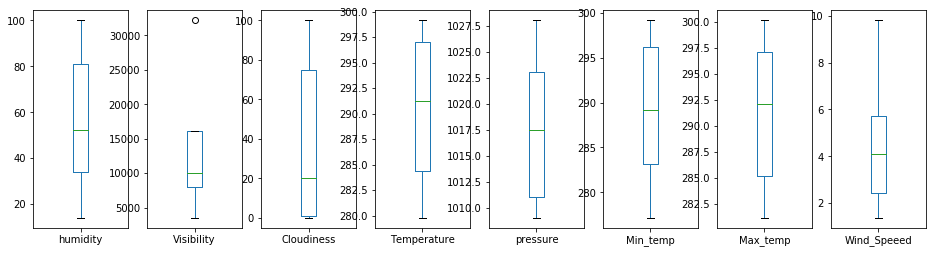

In [92]:
# This is for showing the previous data distribution.
fig, axs = plt.subplots(ncols=8, figsize=(16, 4)) # setting the size of the figuer and putting them into one cell.
weather_data["humidity"].plot.box(ax=axs[0]) # this will create a box blot on Humidity and so on below
weather_data["Visibility"].plot.box(ax=axs[1])
weather_data["Cloudiness"].plot.box(ax=axs[2])
weather_data["Temperature"].plot.box(ax=axs[3])
weather_data["pressure"].plot.box(ax=axs[4])
weather_data["Min_temp"].plot.box(ax=axs[5])
weather_data["Max_temp"].plot.box(ax=axs[6])
weather_data["Wind_Speeed"].plot.box(ax=axs[7])

# As can be seen below data distribution, the data are properly distributed but Visibility data has outlier. 
# To deal with that, I have used the average values in my analysis to avoid outliers.

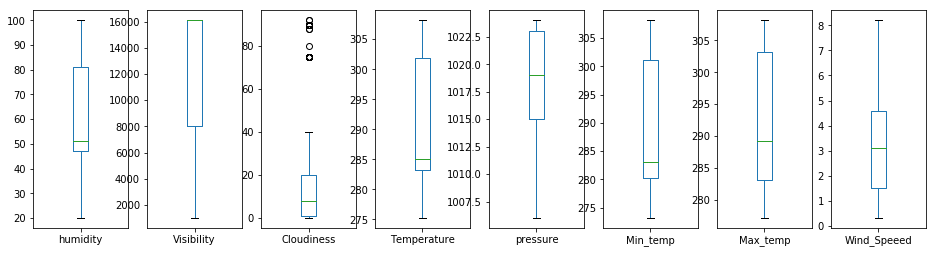

In [93]:
# This is for showing the updated data distribution.
fig, axs = plt.subplots(ncols=8, figsize=(16, 4))
weather_data_Updated["humidity"].plot.box(ax=axs[0])
weather_data_Updated["Visibility"].plot.box(ax=axs[1])
weather_data_Updated["Cloudiness"].plot.box(ax=axs[2])
weather_data_Updated["Temperature"].plot.box(ax=axs[3])
weather_data_Updated["pressure"].plot.box(ax=axs[4])
weather_data_Updated["Min_temp"].plot.box(ax=axs[5])
weather_data_Updated["Max_temp"].plot.box(ax=axs[6])
weather_data_Updated["Wind_Speeed"].plot.box(ax=axs[7])

# As can be seen below data distribution, the data are properly distributed but the Cloudiness data has outlier. 
# To deal with that, I have used the average values in my analysis to avoid outliers.

### The above analysis was conducted for understanding the data distribution. To know how data are distributed and to check the noise and outliers.

Text(0.5,1,'Fit results: mu = 289.94,  std = 6.40')

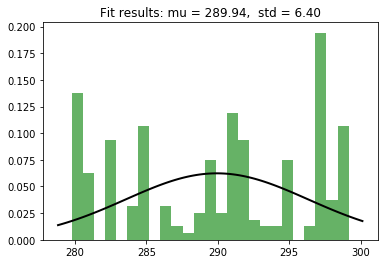

In [650]:
# This is a plot to understand the Temperature data of the data set
# to understand the trend of the temperature over all the countries
mu, std = norm.fit(weather_data["Temperature"]) # getting the standard deviation and mu value by norm.fit method
plt.hist(weather_data["Temperature"], bins=25, normed=True, alpha=0.6, color='g') # plotting the histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2) # ploting the lines showing the distribution from min to max on standard deviation and mu values
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

<h2> First Analysis: <h2>

### Analysis in US and India data

#### As US and India both belong to Northern Hemisphere of Equator. So, to avoid the interference of native geographical condition I have analysed the weather condition between contries belong to same equator regions.Also, the zip codes are taken where the tropic of cancer shows the similar effects on the weather to get the normalized parametrs. 

In [391]:
# To just understand average of the data for future analysis.
# The average of all the coluns tells how data are changed in both of the countries. 
wu=weather_data_US.describe() # to get the summary
wi=weather_data_IN.describe()
summary_both= pd.concat([wu[1:2],wi[1:2]], axis=0 ) # sliced only mean part of the describe function output.
summary_both.index= ["Mean_US", "Mean_IN"] # making index
summary_both

,Cloudiness,Visibility,Temperature,humidity,pressure,Min_temp,Max_temp,Wind_Speeed
Mean_US,23.894737,15821.957895,286.602316,35.936842,1017.905263,285.360526,287.950000,5.602842
Mean_IN,10.566038,5962.264151,297.783396,54.716981,1011.962264,297.338679,298.263208,1.893962


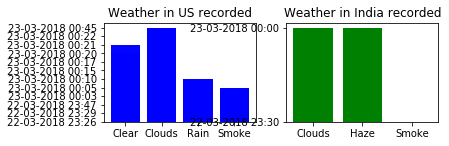

In [646]:
# Plotting the weather type on the time when data is recorded
plt.figure()
plt.subplot(221)    # use subplot to show the graphs in a same cell of notebook
plt.bar(weather_data_US["Weather_type"],weather_data_US["Data_cal_Time"],align='center', alpha=.88, color=['blue'])
plt.title('Weather in US recorded')  # giving title of the graph

plt.subplot(222)
plt.bar(weather_data_IN["Weather_type"],weather_data_IN["Data_cal_Time"],align='center', alpha=.88, color=['green'])
plt.title('Weather in India recorded')
plt.show()

### As can be seen from the above 2 graphs, for the same time when data is recorded US has seen the Rainfall but India hadn't. So, I have analysed why it happened below:

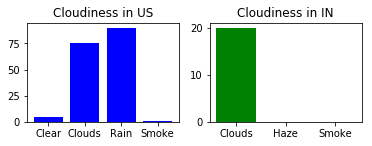

In [155]:
# As can be seen in the below graphs, the cloudiness percentage is high in US, maximum is 90 (weather_data_US["Cloudiness"].max())
# Whereas the maximum cloudiness percentage in india is only 20 (weather_data_IN["Cloudiness"].max())
# also, the average cloudiness in US is 23.89 and 10.56 in India
# So, Cloudiness is one of the parameters for rain fall and if its more, the chances of precipitation is quite high and vice versa.
# Hence, US seen more rain than India
plt.figure()
plt.subplot(221)
plt.bar(weather_data_US["Weather_type"],weather_data_US["Cloudiness"],align='center', alpha=.88, color=['blue'])
plt.title('Cloudiness in US')
#plt.show() 
plt.subplot(222)
plt.bar(weather_data_IN["Weather_type"],weather_data_IN["Cloudiness"],align='center', alpha=.88, color=['green'])
plt.title('Cloudiness in IN')
plt.show()

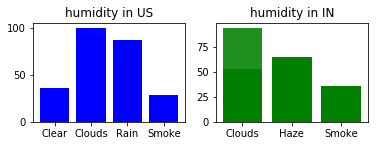

In [164]:
# Another parameter for raining is humidity.
# As the Humidity in US is quite low as compare to the India which cause more rain in US than India.
#The average humidity is US is 35.9368 (weather_data_US["humidity"].mean())
# Where the average humidity in India is 54.71 (weather_data_IN["humidity"].mean())
# As lower humidity cause more rain which can be seen in the below graphs where US seen rain but not India
plt.figure()
plt.subplot(221)
plt.bar(weather_data_US["Weather_type"],weather_data_US["humidity"],align='center', alpha=.88, color=['blue'])
plt.title('humidity in US')
#plt.show() 
plt.subplot(222)
plt.bar(weather_data_IN["Weather_type"],weather_data_IN["humidity"],align='center', alpha=.88, color=['green'])
plt.title('humidity in IN')
plt.show()

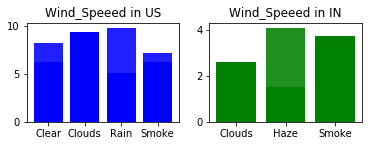

In [168]:
# Another parameter for raining is Wind Speed.
# As the Wind Speed in US is quite High as compare to the India which cause more rain in US than India.
#The average Wind Speed is US is 5.60 (weather_data_US["Wind_Speeed"].mean()) and Maximum is 9.8
# Where the average Wind Speed in India is 1.89 (weather_data_IN["Wind_Speeed"].mean()) and Maximum is 4.1
# The Wind Speed here is the speed of wind at ground level not at the cloud level.
# As Higher the Wind Speed cause more rain which can be seen in the below graphs where US seen rain but not India.

plt.figure()
plt.subplot(221)
plt.bar(weather_data_US["Weather_type"],weather_data_US["Wind_Speeed"],align='center', alpha=.88, color=['blue'])
plt.title('Wind_Speeed in US')
#plt.show() 
plt.subplot(222)
plt.bar(weather_data_IN["Weather_type"],weather_data_IN["Wind_Speeed"],align='center', alpha=.88, color=['green'])
plt.title('Wind_Speeed in IN')
plt.show()

## So as per the above analysis, the probability of rainfall is dependent on the Couldiness, Humidity and wind speed. Result- when Couldiness and Wind speed is high and humidity is relatively low then there will be possibility of rain fall

<h3>To understand more patterns I have analysed the same parameters recorderd day after when the above recorded<h3>

In [663]:
# This is the updated data which recorded after one day to the above recorded day
# To understand average of the data for future analysis.
# The average of all the coluns tells how data are changed in both of the countries. 
wu=weather_data_Updated_US.describe()  # get the summary
wi=weather_data_Updated_IN.describe()
summary_both_Up= pd.concat([wu[1:2],wi[1:2]], axis=0 )  #sliced only mean part of the describe function output.
summary_both_Up.index= ["Mean_US", "Mean_IN"]
summary_both_Up


,Cloudiness,Visibility,Temperature,humidity,pressure,Min_temp,Max_temp,Wind_Speeed
Mean_US,21.768421,16076.063158,281.988105,64.905263,1021.610526,279.686842,284.265789,2.848211
Mean_IN,13.584906,6532.075472,303.706038,42.188679,1014.698113,303.168868,304.451887,3.296226


### I have taken the same parameters as above in analysing the weather of US and India. As this time both of the countries havn't seen the rain fall due to parameters changes. Below I have analysed why it happened

#### I have plotted all the 3 primarily parameters including Cloudiness, humidity and Wind speed against the weather_type for both countries. 

**** This analysis is done on updated data ****


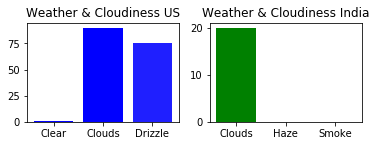

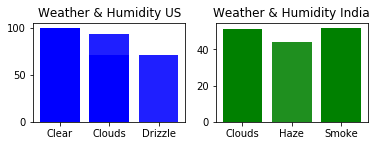

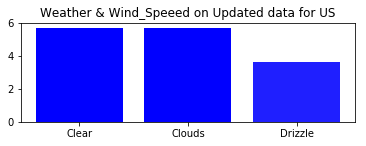

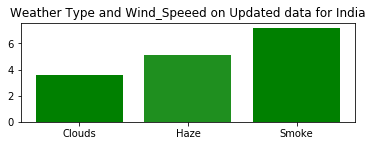

In [555]:
# As explain above the role of Cloudiness in rain fall, I have plotted Cloudiness and weather type.
# Appreantly both of the Countries have not seen the rain as Cloudiness percentage got drop.
# As the average for US was 23.89 before. I am taking for US only as India has not seen rain then and now so
# Now it is 21.76 (weather_data_Updated_US["Cloudiness"].mean())
# This comparision can be seen in the below first row graph
print("**** This analysis is done on updated data ****")
plt.figure()
plt.subplot(221)    # use subplot to show the graphs in a same cell of notebook
plt.bar(weather_data_Updated_US["Weather_type"],weather_data_Updated_US["Cloudiness"],align='center', alpha=.88, color=['blue'])
plt.title('Weather & Cloudiness US')
plt.subplot(222)
plt.bar(weather_data_Updated_IN["Weather_type"],weather_data_Updated_IN["Cloudiness"],align='center', alpha=.88, color=['green'])
plt.title('Weather & Cloudiness India')

# As explain above the role of humidity in rain fall, I have plotted humidity and weather type.
# Appreantly both of the Countries have not seen the rain as humidity percentage got Up.
# As the average for US was 35.93 before.
# Now it is 64.90 (weather_data_Updated_US["humidity"].mean())
# This comparision can be seen in the below second row graph

plt.figure()
plt.subplot(223)    # use subplot to show the graphs in a same cell of notebook
plt.bar(weather_data_Updated_US["Weather_type"],weather_data_Updated_US["humidity"],align='center', alpha=.88, color=['blue'])
plt.title('Weather & Humidity US')
plt.subplot(224)
plt.bar(weather_data_Updated_IN["Weather_type"],weather_data_Updated_IN["humidity"],align='center', alpha=.88, color=['green'])
plt.title('Weather & Humidity India')

# As explain above the role of Wind_Speeed in rain fall, I have plotted Wind_Speeed and weather type.
# Appreantly both of the Countries have not seen the rain as Wind_Speeed percentage got Drop.
# As the average for US was 5.60 before.
# Now it is 2.84 (weather_data_Updated_US["Wind_Speeed"].mean())
# This comparision can be seen in the below second row graph

plt.figure()
plt.subplot(211)
plt.bar(weather_data_Updated_US["Weather_type"],weather_data_Updated_US["Wind_Speeed"],align='center', alpha=.88, color=['blue'])
plt.title('Weather & Wind_Speeed on Updated data for US')
plt.show() 
plt.subplot(212)
plt.bar(weather_data_Updated_IN["Weather_type"],weather_data_Updated_IN["Wind_Speeed"],align='center', alpha=.88, color=['green'])
plt.title('Weather Type and Wind_Speeed on Updated data for India')
plt.show()

<h2>Summarizing the above Analysis<h2>

In [470]:
# clubing all the summary data for making the conclusion of this analysis
summary_both_Mix= pd.concat([summary_both,summary_both_Up], axis=0 ) # concating the data row bise
summary_both_Mix.index= ["Mean_US_Before", "Mean_IN_Before", "Mean_US_After", "Mean_IN_After"] # putting the index explicitely
summary_both_Mix

,Cloudiness,Visibility,Temperature,humidity,pressure,Min_temp,Max_temp,Wind_Speeed
Mean_US_Before,23.894737,15821.957895,286.602316,35.936842,1017.905263,285.360526,287.950000,5.602842
Mean_IN_Before,10.566038,5962.264151,297.783396,54.716981,1011.962264,297.338679,298.263208,1.893962
Mean_US_After,21.768421,16076.063158,281.988105,64.905263,1021.610526,279.686842,284.265789,2.848211
Mean_IN_After,13.584906,6532.075472,303.706038,42.188679,1014.698113,303.168868,304.451887,3.296226


### As can be seen from the above table, all the necessary parameters for weather have been changed. Hence rainfall has not seen in both of the countries. The Cloudiness and Wind speed has dropped whereas the humidity get raised. So due to these changes in the parameters rainfall has not seen in both the coutries. Note- as pressure for both the countries are somewhat same in both the time so I havn't taken this in analysis.

<h2>Second Analysis:<h2>

## Now I have compare the visibility in US and India below:

#### The visibility is related to the Cloudiness so I have taken the cloudiness and visibility of both the countries.

##### This analysis is done on previous data

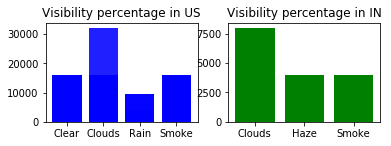

In [207]:
# visibility is a measure of the distance at which an object or light can be clearly discerned. 
#It is reported within surface weather observations depending upon the country.
# The visibility depends on the weather condition so I am analysing the visibility percentage against the weather type
# In both of the coutries, Visibility is high in Cloud weather. However, US has seen the way high visibility than India
# As the average visibility in US is 15821 (weather_data_US["Visibility"].mean())
# Whereas the average visibility in India is just 5962 (weather_data_IN["Visibility"].mean())
plt.figure()
plt.subplot(221)
plt.bar(weather_data_US["Weather_type"],weather_data_US["Visibility"],align='center', alpha=.88, color=['blue'])
plt.title('Visibility percentage in US')
#plt.show() 
plt.subplot(222)
plt.bar(weather_data_IN["Weather_type"],weather_data_IN["Visibility"],align='center', alpha=.88, color=['green'])
plt.title('Visibility percentage in IN')
plt.show()

### The reason behind high visibility in US than India is US has more cloudiness than India. As More cloudiness cause more visibility on a surface level and less cloudiness cause less visibility. I have analysed this concept below:


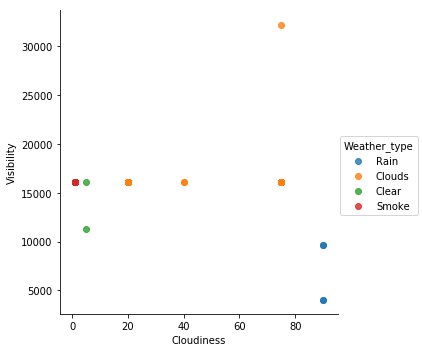

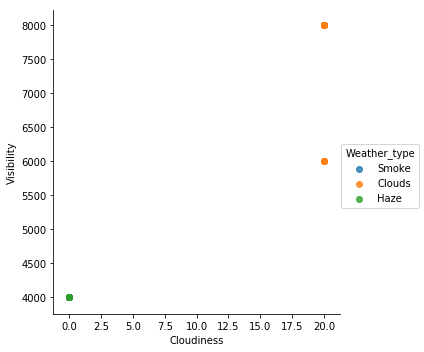

In [285]:
# I have plotted the graph between Cloudiness and visibility using the weather type to understand how the cloudiness play
# vital role visibility metar.
# As can be seen from the below 2 graphs of US and India, when Cloudiness percentage is high, visibility is also shown high.
# For us the average Cloudines is 23.89 (weather_data_US["Cloudiness"].mean())
# For India the average Cloudiness is 10.56 (weather_data_IN["Cloudiness"].mean())
# Hence, the visibility seen high in US than India.

sns.lmplot( x="Cloudiness", y="Visibility", data=weather_data_US,fit_reg=False, hue='Weather_type',legend=True)
plt.show()
sns.lmplot( x="Cloudiness", y="Visibility", data=weather_data_IN,fit_reg=False, hue='Weather_type',legend=True)
plt.show()

### Now I have taken the same analysis on updated data

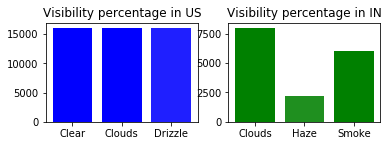

In [472]:
# I have analysed on the same parameters here as above.
# In both of the coutries, Visibility is high in Cloud weather. However, US has seen the way high visibility than India
# As the average visibility in US is 16076 (weather_data_Updated_US["Visibility"].mean())
# Whereas the average visibility in India is just 6532 (weather_data_Updated_IN["Visibility"].mean())
plt.figure()
plt.subplot(221)
plt.bar(weather_data_Updated_US["Weather_type"],weather_data_Updated_US["Visibility"],align='center', alpha=.88, color=['blue'])
plt.title('Visibility percentage in US')
#plt.show() 
plt.subplot(222)
plt.bar(weather_data_Updated_IN["Weather_type"],weather_data_Updated_IN["Visibility"],align='center', alpha=.88, color=['green'])
plt.title('Visibility percentage in IN')
plt.show()

### To undestand this again, I have analysed the Visibility with the cloudiness as More cloudiness cause more visibility on a surface level and less cloudiness cause less visibility. I have analysed this concept below:

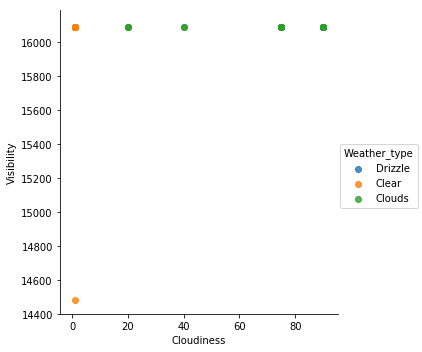

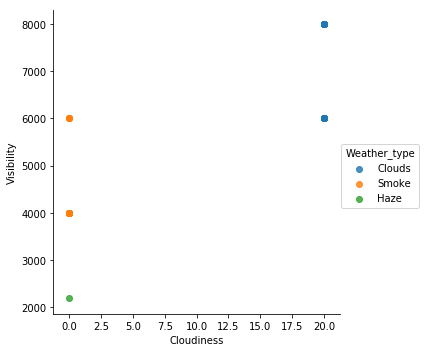

In [478]:
# I have plotted the graph between Cloudiness and visibility using the updated weather type to understand how the cloudiness 
#play vital role visibility metar.
# As can be seen from the below 2 graphs of US and India, when Cloudiness percentage is high, visibility is also shown high.
# For us the average Cloudines is 21.76 (weather_data_Updated_US["Cloudiness"].mean())
# For India the average Cloudiness is 13.58 (weather_data_Updated_IN["Cloudiness"].mean())
# Hence, the visibility seen high in US than India.

sns.lmplot( x="Cloudiness", y="Visibility", data=weather_data_Updated_US,fit_reg=False, hue='Weather_type',legend=True)
plt.show()
sns.lmplot( x="Cloudiness", y="Visibility", data=weather_data_Updated_IN,fit_reg=False, hue='Weather_type',legend=True)
plt.show()

### As per the above analysis, Visibility is more in US than India because both of the time, US has greater cloudiness percentage than India.

<h2>Third Analysis:<h2>

## I have compare all the parameters for Northern Hemisphere and Southern Hemisphere of Equator. The Countries of Northern Hemisphere are US and India. The Countries of Southern Hemisphere are Australia and New Zealand.

### As Equator plays a vital role in weather measuramens So I have compare the countries of both the hemisphare of Equator on all the necessary parameters.

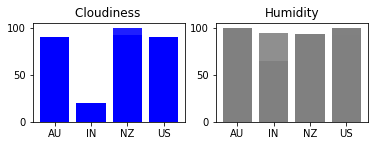

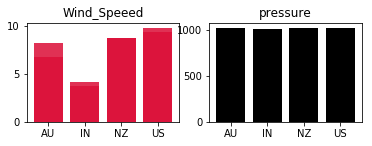

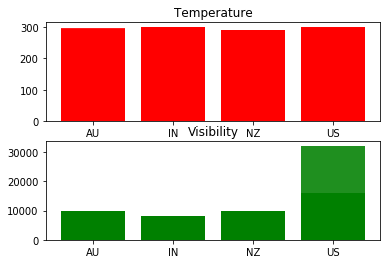

In [563]:
# First graph is shown for Cloudiness percentage shown in the coutries of both hemisphare
plt.figure()
plt.subplot(221)    # use subplot to show the graphs in a same cell of notebook
plt.bar(weather_data["Country"],weather_data["Cloudiness"],align='center', alpha=.88, color=['blue']) # plotting the bar charts
plt.title('Cloudiness ') # putting title
# This is a second graph for humidity percentage shown in countries of both hemisphare
plt.subplot(222)    # use subplot to show the graphs in a same cell of notebook
plt.bar(weather_data["Country"],weather_data["humidity"],align='center', alpha=.88, color=['gray'])
plt.title('Humidity')
# This is a Third graph for Wind_Speeed encountered in the countries of both hemisphare

plt.figure()
plt.subplot(223) # putting the place of the graph in cell
plt.bar(weather_data["Country"],weather_data["Wind_Speeed"],align='center', alpha=.88, color=['crimson'])
plt.title('Wind_Speeed')
# This is a 4th graph for pressure encountered in the countries of both hemisphare
plt.subplot(224)
plt.bar(weather_data["Country"],weather_data["pressure"],align='center', alpha=.88, color=['black'])
plt.title('pressure')

# This is a 5th graph for Temperature encountered in the countries of both hemisphare
plt.figure() # to create the figure in the cell
plt.subplot(211)
plt.bar(weather_data["Country"],weather_data["Temperature"],align='center', alpha=.88, color=['red'])
plt.title('Temperature')
# This is a 6th graph for Visibility encountered in the countries of both hemisphare
plt.subplot(212)
plt.bar(weather_data["Country"],weather_data["Visibility"],align='center', alpha=.88, color=['green'])
plt.title('Visibility')
plt.show()  # to render the graph

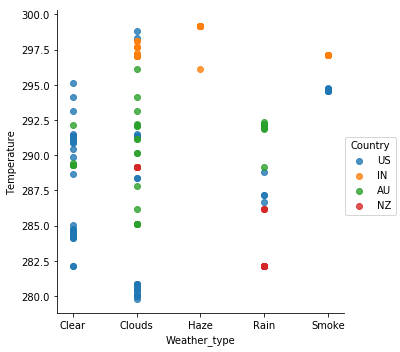

In [562]:
# To check the Temperature in both of the hemisphare in all the weathers:
# Plotting the scatter plot between weather type and temperature on the basis of country which shown in colors
sns.lmplot( x="Weather_type", y="Temperature", data=weather_data,fit_reg=False, hue='Country',legend=True)
plt.show()

### Summary of this Analysis:- The countries of the same hemisphare shown the similarity as native weather parameters are same for them. However, on some parameters the diffrence of  northen hemisphare coutries are more than the diffrence of Southern hemisphare countries. As the US and India shown diffrent conditions for Cloudiness, wind speed and Visibility which are inter related prameters. But Southern Countries like Australia and new zealand has miner diffrences in their weather parameters except Cloudiness percentage which new zealand has marginally more than Australia and others parameters are approximately not very much differ. Wheres the Pressure and temperature are approximately same for all the countries irrespective of their hemisphare. The major diffrence seen between India and US in Cloudiness and Visibility as both are interrelated so one is differ other will automatically differ. Lastly, the Temperature range from min to max is close for all the countries. And maximum coutries had the cloud weather followed by the second highest weather Clear. Also, Only India has the Haze weather but not seen rain at all.


<h2>Fourth Analysis:<h2>

## I have analysed the Sunrise and Sunset time in both the Hemisphare

### First, I have plotted the Sunrise time recored in all the 4 coutries to analyse which country has the first sun rise. As the Eastern countries which are below the Equator will seen the Sun rise first than western coutries.  Below is the graph backing the same concept encountered in the given data:

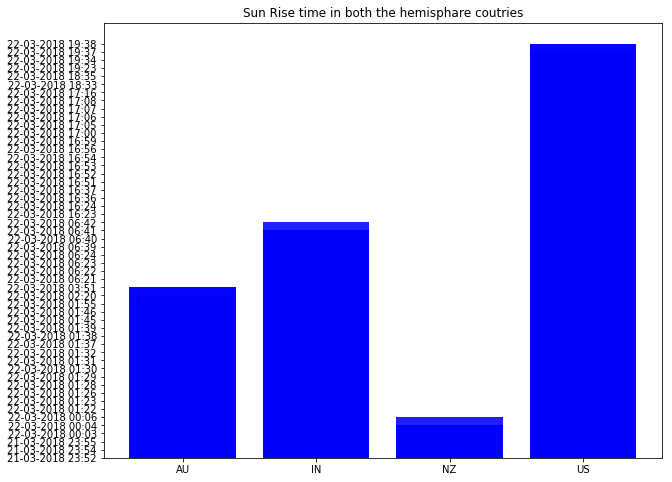

In [582]:
# plotting the Sunrise time as per the countries of both hemisphare
fig, ax = plt.subplots(figsize=(10, 8)) # Fixing the figure size and positions
plt.bar(weather_data["Country"],weather_data["Sunrise_Time"],align='center', alpha=.88, color='Blue')
plt.title('Sun Rise time in both the hemisphare coutries') # putting the title
plt.show()

### As can be seeen from the above bar chart, New Zealand has the Sunrise first followed by the Australia and India. And latest Sun rise time shown in US. As New Zealand and Australia both are the Southern Hemisphare country and are below to the Equator. Moreover both are at the East side where Sun rises. On the other hand, India and US both are above th Equator and comparetivly at the west side from New zealand and Australia so the Sunrise is little late here. However, US is at the completely west side where sun rays reach at last so sun rise is very late in US. 

### Second, I have plotted the Sunset time recored in all the 4 coutries to analyse which country has the first sun set. As the Western countries which are above the Equator, sunset will be late as they are on the west side where sun sets. Below is the graph backing the same concept encountered in the given data:

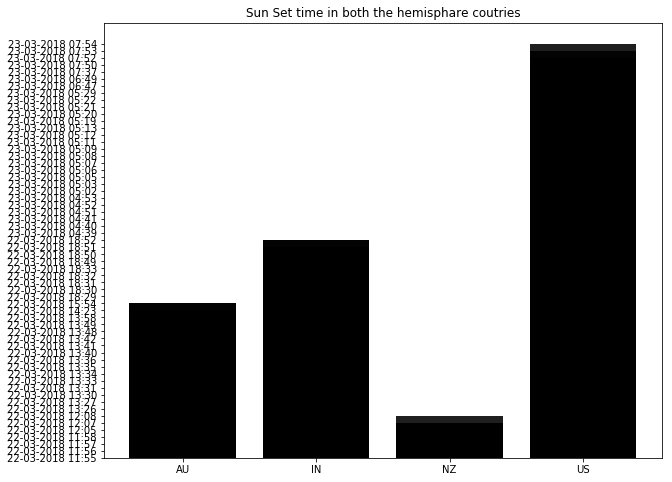

In [585]:
# plotting the Sunset time as per the countries of both hemisphare
fig, ax = plt.subplots(figsize=(10, 8)) # Fixing the figure size and positions
plt.bar(weather_data["Country"],weather_data["Sunset_Time"],align='center', alpha=.88, color='Black')
plt.title('Sun Set time in both the hemisphare coutries')
plt.show()

### As can be seeen from the above bar chart, US has the latest sunset time followed by India and Australia. Whereas New Zeland has the earliest time at which Sun sets. As India and US both belong to Northen Hemispahe and are above the equator. Moreover both are comparetivly at the west side from New zealand and Australia so the Sunset is little late here. However, US is at the completely west side where sun sets so sun set is very late in US. 

## Summary of this Analysis:- The Southern hemisphare Countries see the early sun rise and early sun set. Whereas the Northen Countries see the late sunrise and late sunset. 

<h2>Fifth Analysis:<h2>

### I have analysed the percentage of weather type and plotted in the scatter plot. As per the data, the weather type cloud is the highest percentage wethaer type among all. As we have seen so far all the countries of both the hemisphare has maximum weather as Clouds and lowest as Drizzle or fog. 

Text(0.5,1,'Weather Percentage')

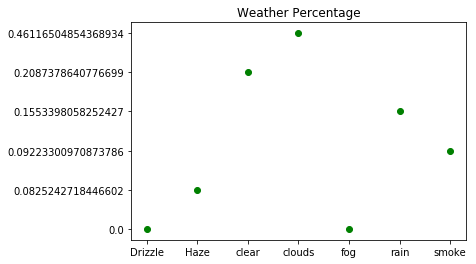

In [648]:
# Plotting the scatter plot between weather type and their percentage
plt.scatter(Wet_type,per, c="g")
plt.title("Weather Percentage") # putting the title.

### As per the above analysis, the clouds is at the highest percentage weather followed by clear and rain then smoke. However, haze is very less weather type in all the countries. However, Drizzle and fog are not seen anywhere.

<h1>Final Analysis Summary and Conclusion:<h1>

<h3>Summary:<h3>

### I have taken the two data set from the current weather records API. The first dataset is fetched on 23th march 2018 and the second is fetched day after i.e. 24th March 2018. I have used these 2 data set to compare the weather change happen over the one day time period according to the parameters. My primary analysis is based on the weather condition in the countries present in the dataset. First, I have split the countries by the Equator line which divides the the countries geographally into 2 main parts which are Northen hemisphare and southern hemisphare. Northern Hemisphare has US and India and located above the Equator line. Southern Hemisphare has Australia and New Zeland located below the Equator line. To avoid the local parameters interferance, I have analysed the counties of the same Hemispahre first. And then compare both the hemisphare countries on the same parameters. As, my first 2 analysis is to compare the weather parameters of one day before and after the data recorded. And my remaining analysis is based on how parameters changes cause diffrent weather condition overs the diffrent geographical regions. Last analysis is the percentage of the weather type recorded for all the countries. 

<h3>Conclusion:<h3>

### In all my analysis I have obesered that weather type is closely related to wind speed, temperature, Cloudiness and Humidity percentage.As if the cloudiness and wind speed (on surface) are high but humidity is low then there might be good chance of getting rain fall. So I found these parameters closly connected for weather type. Whereas, the visibility is more dependent on Cloudiness as if Cloudiness percentage is high, visibility will be high and vice versa. On the other hand, I have obesered how the Equator lines plays a vital role in weather condition world wide. And how even in the same Hemisphare, coutries shown diffrent weather condition due to underlying parameters on the top of their native parameters. Besides, the Estern counties which are in Southern Hemisphare got the early sun rise and sun set whereas Northen hemisphare Western countries got late sun rise and sunset. Lastly, the clouds weather is the highest type of weather in all around the countries. 

This analysis is based on the current data but I have wrote the code in a flexible manner so it can be reused in future by giving the API parameters. 